In [1]:
# Libraries
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

import matplotlib

import matplotlib.pyplot as plt

# Increase row display
pd.options.display.max_rows = 999

In [2]:
# install driver which is an object and allows us to manipulate our browser
#this should open a new browser window
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Downloading:  73%|█████████████████████████████████████████               | 4.55M/6.21M [00:00<00:00, 14.2MB/s]<ipython-input-2-2b44d2a4cff3>:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


# Full Code


In [3]:
# Create driver
    #this should open a new browser window
driver = webdriver.Chrome(ChromeDriverManager().install())

# Go to the characters in a book
# Open web page and navigate to Characters in the stories
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

# Let's try a different url
#page_url = "https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters"
#driver.get(page_url)

# Click on accept cookies
time.sleep(3)
#driver.find_element(By.XPATH, '//div[text()="ACCEPT"]').click()

# Find books
book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

books = []

for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name': book_name, "url":book_url})
books


<ipython-input-3-205cb0fef6b3>:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.21M/6.21M [00:20<00:00, 14.2MB/s]

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [4]:
character_list = []
for book in books:
# go to page
    driver.get(book['url'])
    
    # Get the character elements
    character_elems = driver.find_elements(By.CLASS_NAME, "category-page__member-link")    

    for elem in character_elems:
        character_list.append({'book': book['book_name'], 'character': elem.text})

In [5]:
character_list

[{'book': 'Category:Baptism of Fire characters', 'character': 'Adalia'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Adela'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Aen Saevherne'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Aevenien'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Aglaïs'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Albrich'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Amavet'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Angus Bri Cri'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Anna Kameny'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Anzelm Aubry'},
 {'book': 'Category:Baptism of Fire characters',
  'character': 'Artaud Terranova'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Asse'},
 {'book': 'Category:Baptism of Fire characters',
  'character': 'Assire var Anahid'},
 

In [6]:
# convert to dataframe
character_df = pd.DataFrame(character_list)
character_df

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs
...,...,...
1270,Category:Time of Contempt characters,Yanna of Murivel
1271,Category:Time of Contempt characters,Yarpen Zigrin
1272,Category:Time of Contempt characters,Yennefer of Vengerberg
1273,Category:Time of Contempt characters,Yiolenta Suarez


In [7]:
#  Save to CSV
character_df.to_csv("C:\\Users\\smith\\OneDrive\\Jason\\Datascience\\ScrapingWitcher\\Characters.csv")

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.21M/6.21M [01:29<00:00, 73.0kB/s]


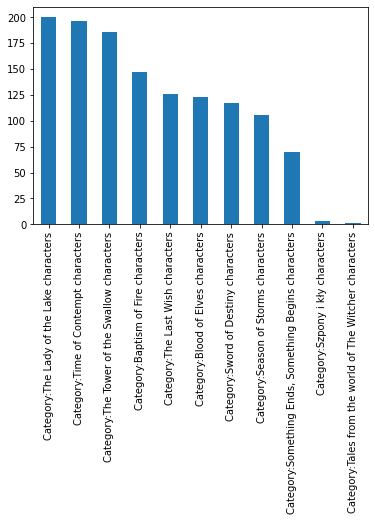

In [8]:
character_df['book'].value_counts().plot(kind="bar")
plt.show()

In [9]:
# importing sweetviz (https://towardsdatascience.com/sweetviz-automated-eda-in-python-a97e4cabacde)
import sweetviz as sv
#analyzing the dataset
chars_report = sv.analyze(character_df)
#display the report
chars_report.show_html('Characters.html')

C:\Users\smith\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



Report Characters.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


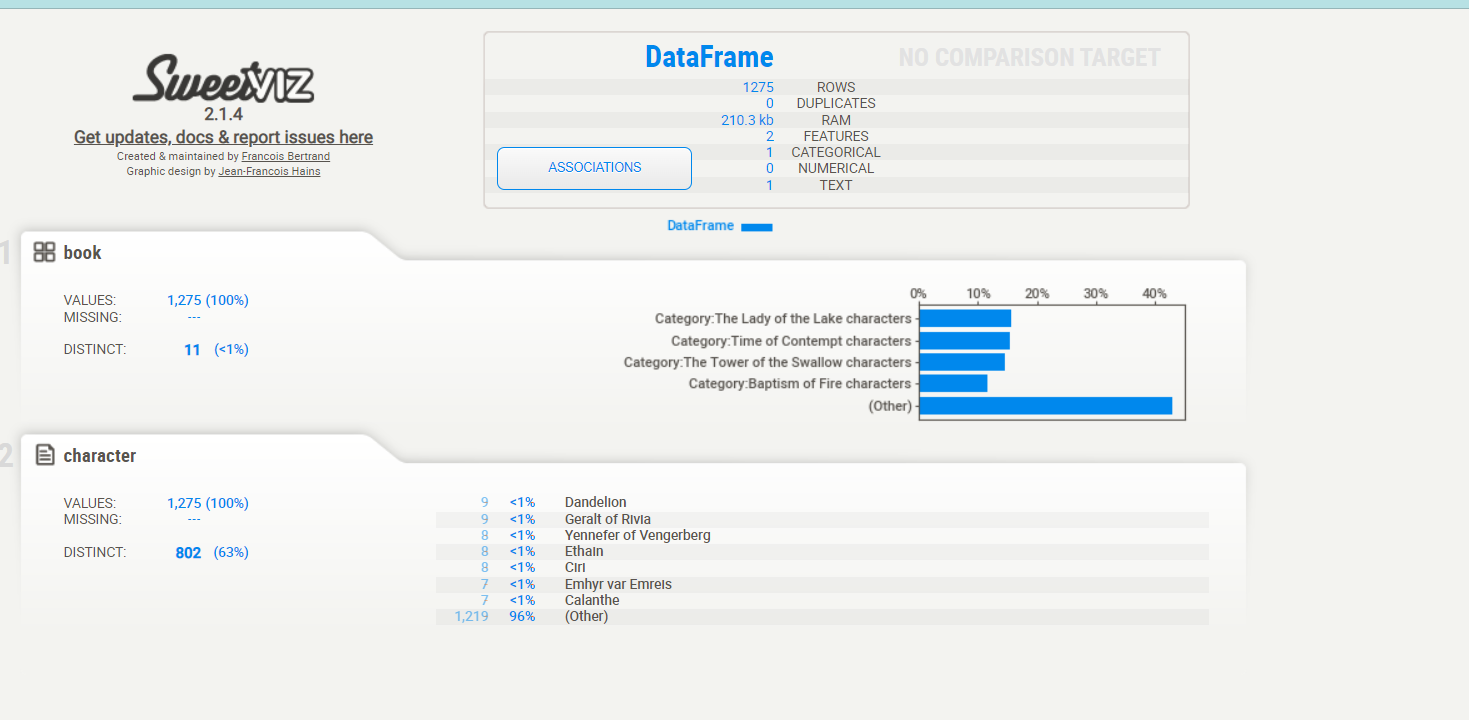

#  Part 2
Network of The Witcher | Relationship Extraction & Network Analysis with Spacy & NetworkX
https://www.youtube.com/watch?v=fAHkJ_Dhr50

In [10]:
import pandas as pd
import numpy as np 
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
##loading english model for spacy
NER=spacy.load("en_core_web_sm")

In [12]:
import os

all_books=[b for b in os.scandir('Data') if '.txt' in b.name]

all_books

[<DirEntry 'B - The Sword of Destiny.txt'>,
 <DirEntry 'C - The Last Wish.txt'>,
 <DirEntry 'E - something ends something begins.txt'>,
 <DirEntry 'I - Blood of Elves.txt'>,
 <DirEntry 'II - Times of Contempt.txt'>,
 <DirEntry 'III - Baptism of Fire.txt'>,
 <DirEntry 'IV - The Tower of the Swallow.txt'>,
 <DirEntry 'V - The Lady of the Lake.txt'>]

In [13]:
book = all_books[0]
book_text = open(book).read()
book_doc=NER(book_text)

In [14]:

##Visualise identified entities (first 2000 entries)
displacy.render(book_doc[0:2000], style="ent", jupyter=True)


In [15]:
##Read characters
character_df=pd.read_csv('characters.csv')


In [16]:
character_df

,Unnamed: 0,book,character
0,0,Category:Baptism of Fire characters,Adalia
1,1,Category:Baptism of Fire characters,Adela
2,2,Category:Baptism of Fire characters,Aen Saevherne
3,3,Category:Baptism of Fire characters,Aevenien
4,4,Category:Baptism of Fire characters,Aglaïs
...,...,...,...
1270,1270,Category:Time of Contempt characters,Yanna of Murivel
1271,1271,Category:Time of Contempt characters,Yarpen Zigrin
1272,1272,Category:Time of Contempt characters,Yennefer of Vengerberg
1273,1273,Category:Time of Contempt characters,Yiolenta Suarez


In [17]:
## Remove brackets and text within Brackets
import re
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]","",x))
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ',1)[0])

In [18]:
pd.set_option('display.max_rows', None)
character_df.head()

,Unnamed: 0,book,character,character_firstname
0,0,Category:Baptism of Fire characters,Adalia,Adalia
1,1,Category:Baptism of Fire characters,Adela,Adela
2,2,Category:Baptism of Fire characters,Aen Saevherne,Aen
3,3,Category:Baptism of Fire characters,Aevenien,Aevenien
4,4,Category:Baptism of Fire characters,Aglaïs,Aglaïs


In [19]:
sent_entity_df=[]
# loop through sentences , store named entity list for each sentence
for sent in book_doc.sents:
    entity_list=[ent.text for ent in sent.ents]
    sent_entity_df.append({'sentence':sent, 'entities':entity_list})
    
sent_entity_df=pd.DataFrame(sent_entity_df)  

In [20]:
sent_entity_df.head()

,sentence,entities
0,"(ï»¿The, Limits, of, the, Possible, \n, I, \n,...",[]
1,"("", It, 's, been, an, hour, and, a, quarter, s...",[an hour and a quarter]
2,"(He, 's, done, for, .)",[]
3,"("", \n, The, townsfolk, ,, huddled, together, ...",[]
4,"(A, fat, man, dressed, in, a, yellow, smock, \...",[one foot]


In [21]:
## Function to filter out non-character entities
def filter_entity(ent_list,character_df):
    return [ent for ent in ent_list
            if ent in list(character_df.character)
            or ent in list(character_df.character_firstname)]

In [22]:
sent_entity_df['character_entities']=sent_entity_df['entities'].apply(lambda x:filter_entity(x, character_df))
## Filter out entities that do not have any character entities e.g []
sent_entity_df_filtered=sent_entity_df[sent_entity_df['character_entities'].map(len)>0]
sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
96,"(Is, there, anything, keeping, you, in, this, ...","[Geralt, Rivia]",[Geralt]
104,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
108,"("", \n, "", There, are, some, ,, "", Geralt, rep...",[Geralt],[Geralt]
140,"("", I, forgot, ,, "", Three, Jackdaws, winked, ...","[Three, Geralt]",[Geralt]
151,"(Geralt, loosened, his, belt, ,, removed, his,...",[Geralt],[Geralt]
157,"("", Do, the, girls, speak, the, common, langua...",[Geralt],[Geralt]
160,"(How, 's, your, soup, ,, Geralt, ?, "", \n, "", ...",[Geralt],[Geralt]
172,"(Yet, there, is, a, certain, principal, underl...",[Geralt],[Geralt]
201,"("", Bad, example, ,, "", interrupted, Geralt, .)","[Bad, Geralt]",[Geralt]
211,"("", I, do, not, hunt, dragons, ,, "", Geralt, r...",[Geralt],[Geralt]


In [23]:
## Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
                                                                                                               for item in x])

<ipython-input-23-7a48495750a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [24]:
pd.reset_option('^display.',silent=True)
sent_entity_df_filtered


,sentence,entities,character_entities
96,"(Is, there, anything, keeping, you, in, this, ...","[Geralt, Rivia]",[Geralt]
104,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
108,"("", \n, "", There, are, some, ,, "", Geralt, rep...",[Geralt],[Geralt]
140,"("", I, forgot, ,, "", Three, Jackdaws, winked, ...","[Three, Geralt]",[Geralt]
151,"(Geralt, loosened, his, belt, ,, removed, his,...",[Geralt],[Geralt]
...,...,...,...
11276,"(The, scene, left, Yurga, speechless, .)",[Yurga],[Yurga]
11288,"(Yurga, did, n't, see, Geralt, 's, face, ,, hi...",[Geralt],[Geralt]
11289,"(He, only, saw, black, -, gloved, hands, squee...",[Ciri],[Ciri]
11300,"("", \n, "", It, 's, just, like, they, predicted...",[Geralt],[Geralt]


# Create Relationships

In [45]:
window_size=5
relationships=[]

for i in range(sent_entity_df_filtered.index[-1]):
    end_i=min(i+5,sent_entity_df_filtered.index[-1])
    char_list=sum((sent_entity_df_filtered.loc[i: end_i].character_entities),[])
    ## Remove same names (Don't want Geralt's relationship with Geralt)
    char_unique = [char_list[i] for i in range(len(char_list))
                   if (i==0) or char_list[i]!= char_list[i-1]]
    
    # Define the network
    if len(char_unique)>1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx+1]
            relationships.append({"source":a, "target":b})

In [46]:
relationship_df=pd.DataFrame(relationships)

In [47]:
pd.set_option('display.max_rows',None)
relationship_df.head()


,source,target
0,Geralt,Niedamir
1,Geralt,Niedamir
2,Geralt,Niedamir
3,Niedamir,Geralt
4,Niedamir,Geralt


In [48]:
# Sort cases with a->b and b->a
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()
print(relationship_df.head(10))

         source      target  value
0        Geralt    Niedamir     13
1      Niedamir      Geralt      6
2        Geralt        Eyck     32
3          Eyck      Geralt     20
4    Dorregaray      Geralt     29
5        Geralt  Dorregaray      7
6    Dorregaray    Yennefer     51
7      Yennefer  Dorregaray     49
8        Geralt      Yarpen     12
9  Gyllenstiern    Niedamir     13


In [50]:
# relationship_df.sort_values(by =["value"], inplace = True)

# Graph analysis and visualization

# Graph Analysis and Visualization

In [29]:
# Create a graph from pandas dataframe
G = nx.from_pandas_edgelist(relationship_df,
                            source="source",
                            target="target",
                            edge_attr="value",
                            create_using = nx.Graph())

# Graph Visualization - NetworkX

In [51]:
# plt.figure(figsize=(10,10))
# pos = nx.kamada_kawai_layout(G)
# nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
# plt.show() 

# Graphvis - pyvis

from pyvis.network import Network

In [31]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color = 'white')
net.from_nx(G)
net.show("Witcher.html")
